In [85]:
import pandas as pd
from glob import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mdisplay(df):
    with pd.option_context('display.max_columns', None):
        display(df)

### Merging 12 months of sales data into a single file

In [3]:
folderpath = './SalesAnalysis/Sales_Data'
filenames = glob(folderpath + '/*')
keys = []
dfs = []
for x in filenames:
    temp = pd.read_csv(x, parse_date = ["datetime"])
    temp[['Price Each', 'Quantity Ordered']] = temp[['Price Each', 'Quantity Ordered']].apply(pd.to_numeric, errors = 'coerce')
    temp = temp.dropna().reset_index(drop = True)
    dfs.append(temp)
    result = re.search("_([a-zA-Z]*)_", x)
    keys.append(result.group(1))
concatenated = pd.concat(dfs, keys = keys)
mdisplay(concatenated)

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each          Order Date  \
April     0           11.95 2019-04-19 08:46:00   
          1           99.99 2019-04-07 22:30:00   
          2          600.00 2019-04-12 14:38:00   
          3           11.99 2019-04-12 14:38:00   
          4           11.99 2019-04-30 09:27:00   
...                     ...                 ...   
September 11624        2.99 2019-09-17 20:56:00   
          11625      700.00 2019-09-01 16:00:00   
          11626      700.00 2019-09-23 07:39:00   
          11627      379.99 2019-09-19 17:30:00   
          11628       11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [4]:
data = concatenated.copy()
data.index.levels[0]
data

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each          Order Date  \
April     0           11.95 2019-04-19 08:46:00   
          1           99.99 2019-04-07 22:30:00   
          2          600.00 2019-04-12 14:38:00   
          3           11.99 2019-04-12 14:38:00   
          4           11.99 2019-04-30 09:27:00   
...                     ...                 ...   
September 11624        2.99 2019-09-17 20:56:00   
          11625      700.00 2019-09-01 16:00:00   
          11626      700.00 2019-09-23 07:39:00   
          11627      379.99 2019-09-19 17:30:00   
          11628       11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 6 columns]

In [5]:
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
temp = concatenated.copy()
# temp.index = temp.index.set_levels(pd.CategoricalIndex(temp.index.levels[0].values, categories = months, ordered = True), level = 0)
# temp = temp.sort_index(level = 0)
temp = temp.reset_index(level = 0).rename(columns = {'level_0':'Months'})
temp['Months'] = pd.Categorical(temp['Months'], categories = months, ordered = True)
temp = temp.sort_values(by = 'Months')
temp
# Method 1
# temp = temp.set_index('Months', append = True).rename_axis(index = {None:'Idx'})
# temp.swaplevel('Idx', 'Months', axis = 0)
#OR
temp = temp.set_index('Months', append = True).swaplevel(0,1,axis = 0)
temp

# Method 2
# old_idx = temp.index.to_frame()
# old_idx.insert(0, 'Months',temp['Months'])
# temp.index = pd.MultiIndex.from_frame(old_idx)
# temp.drop(columns = 'Months')

Order ID                     Product  Quantity Ordered  \
Months                                                                  
January  1845    143000        USB-C Charging Cable               1.0   
         3229    144318        USB-C Charging Cable               1.0   
         3228    144317            Wired Headphones               1.0   
         3227    144316    Lightning Charging Cable               1.0   
         3226    144315               Flatscreen TV               1.0   
...                 ...                         ...               ...   
December 16664   311672  Bose SoundSport Headphones               1.0   
         16665   311673        USB-C Charging Cable               1.0   
         16666   311674      AAA Batteries (4-pack)               3.0   
         16644   311655      27in 4K Gaming Monitor               1.0   
         13031   308171       AA Batteries (4-pack)               1.0   

                Price Each          Order Date  \
Months                                           
January  1845        11.95 2019-01-27 20:47:00   
         3229        11.95 2019-01-20 16:46:00   
         3228        11.99 2019-01-18 17:08:00   
         3227        14.95 2019-01-29 16:05:00   
         3226       300.00 2019-01-28 18:33:00   
...                    ...                 ...   
December 16664       99.99 2019-12-02 16:16:00   
         16665       11.95 2019-12-26 22:24:00   
         16666        2.99 2019-12-28 15:19:00   
         16644      389.99 2019-12-07 11:29:00   
         13031        3.84 2019-12-03 18:59:00   

                                      Purchase Address  
Months                                                  
January  1845      97 Lake St, San Francisco, CA 94016  
         3229       490 Chestnut St, Atlanta, GA 30301  
         3228      335 6th St, San Francisco, CA 94016  
         3227    909 Cedar St, San Francisco, CA 94016  
         3226          9 Johnson St, Atlanta, GA 30301  
...                                                ...  
December 16664     400 1st St, San Francisco, CA 94016  
         16665  169 Forest St, San Francisco, CA 94016  
         16666        682 Maple St, Portland, OR 97035  
         16644       219 Madison St, Atlanta, GA 30301  
         13031    655 Main St, San Francisco, CA 94016  

[185950 rows x 6 columns]

### Finding which month was the best for sales

In [6]:
data.insert(4,'Total Price',data['Quantity Ordered'] * data['Price Each'])
# data = data.reindex(months, level = 0)
mdisplay(data)

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each  Total Price          Order Date  \
April     0           11.95        23.90 2019-04-19 08:46:00   
          1           99.99        99.99 2019-04-07 22:30:00   
          2          600.00       600.00 2019-04-12 14:38:00   
          3           11.99        11.99 2019-04-12 14:38:00   
          4           11.99        11.99 2019-04-30 09:27:00   
...                     ...          ...                 ...   
September 11624        2.99         8.97 2019-09-17 20:56:00   
          11625      700.00       700.00 2019-09-01 16:00:00   
          11626      700.00       700.00 2019-09-23 07:39:00   
          11627      379.99       379.99 2019-09-19 17:30:00   
          11628       11.95        11.95 2019-09-30 00:18:00   

                                        Purchase Address  
April     0                 917 1st St, Dallas, TX 75001  
          1            682 Chestnut St, Boston, MA 02215  
          2         669 Spruce St, Los Angeles, CA 90001  
          3         669 Spruce St, Los Angeles, CA 90001  
          4            333 8th St, Los Angeles, CA 90001  
...                                                  ...  
September 11624   840 Highland St, Los Angeles, CA 90001  
          11625  216 Dogwood St, San Francisco, CA 94016  
          11626     220 12th St, San Francisco, CA 94016  
          11627   511 Forest St, San Francisco, CA 94016  
          11628   250 Meadow St, San Francisco, CA 94016  

[185950 rows x 7 columns]

In [335]:
req_stats = data.reindex(index = months, level = 0)['Total Price'].groupby(level = 0, sort = False).sum()#.sort_values(ascending = False)
# req_month = req_stats.index[0]
display(req_stats)
# print('Highest sales were in the month of',req_month,' Sales -', req_stats[req_month])

January      1815335.12
February     2203481.24
March        2809063.30
April        3396059.11
May          3144584.80
June         2578293.30
July         2646899.69
August       2244412.31
September    2098816.70
October      3736884.05
November     3198909.23
December     4619297.12
Name: Total Price, dtype: float64

Text(0, 0.5, 'Sales (x 10^6)')

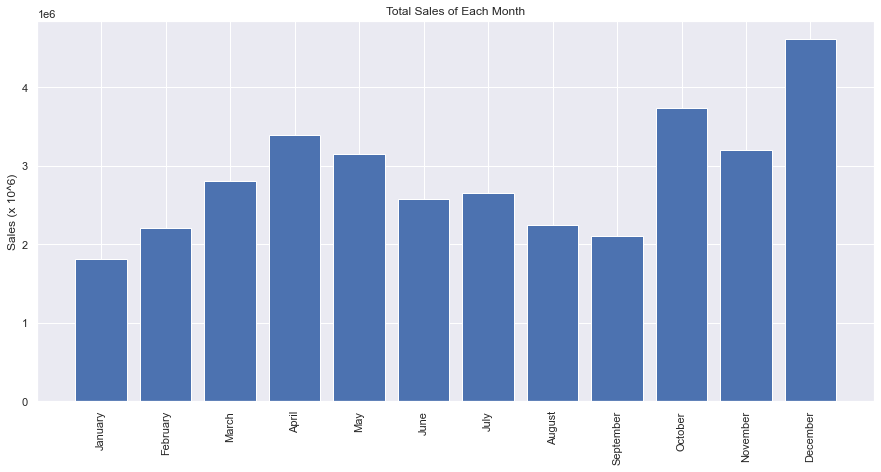

In [336]:
plt.bar(x = req_stats.index, height = req_stats.values)
plt.xticks(rotation = 90)
plt.title('Total Sales of Each Month')
plt.ylabel('Sales (x 10^6)')

### Finding which city had max sales

In [9]:
data['City'] = 'x'
data['City'] = data['Purchase Address'].apply(lambda x : f"{re.search(', ([A-Za-z ]*),', x).group(1)} ({re.findall(', ([A-Z]*)', x)[1]})")
data

Order ID                     Product  Quantity Ordered  \
April     0       176558        USB-C Charging Cable               2.0   
          1       176559  Bose SoundSport Headphones               1.0   
          2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          4       176561            Wired Headphones               1.0   
...                  ...                         ...               ...   
September 11624   259353      AAA Batteries (4-pack)               3.0   
          11625   259354                      iPhone               1.0   
          11626   259355                      iPhone               1.0   
          11627   259356      34in Ultrawide Monitor               1.0   
          11628   259357        USB-C Charging Cable               1.0   

                 Price Each  Total Price          Order Date  \
April     0           11.95        23.90 2019-04-19 08:46:00   
          1           99.99        99.99 2019-04-07 22:30:00   
          2          600.00       600.00 2019-04-12 14:38:00   
          3           11.99        11.99 2019-04-12 14:38:00   
          4           11.99        11.99 2019-04-30 09:27:00   
...                     ...          ...                 ...   
September 11624        2.99         8.97 2019-09-17 20:56:00   
          11625      700.00       700.00 2019-09-01 16:00:00   
          11626      700.00       700.00 2019-09-23 07:39:00   
          11627      379.99       379.99 2019-09-19 17:30:00   
          11628       11.95        11.95 2019-09-30 00:18:00   

                                        Purchase Address                City  
April     0                 917 1st St, Dallas, TX 75001         Dallas (TX)  
          1            682 Chestnut St, Boston, MA 02215         Boston (MA)  
          2         669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)  
          3         669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)  
          4            333 8th St, Los Angeles, CA 90001    Los Angeles (CA)  
...                                                  ...                 ...  
September 11624   840 Highland St, Los Angeles, CA 90001    Los Angeles (CA)  
          11625  216 Dogwood St, San Francisco, CA 94016  San Francisco (CA)  
          11626     220 12th St, San Francisco, CA 94016  San Francisco (CA)  
          11627   511 Forest St, San Francisco, CA 94016  San Francisco (CA)  
          11628   250 Meadow St, San Francisco, CA 94016  San Francisco (CA)  

[185950 rows x 8 columns]

City
Atlanta (GA)          2795498.58
Austin (TX)           1819581.75
Boston (MA)           3661642.01
Dallas (TX)           2767975.40
Los Angeles (CA)      5452570.80
New York City (NY)    4664317.43
Portland (ME)          449758.27
Portland (OR)         1870732.34
San Francisco (CA)    8262203.91
Seattle (WA)          2747755.48
Name: Total Price, dtype: float64


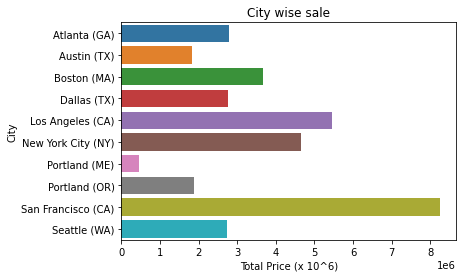

In [41]:
city_wise = data.groupby(by = 'City').sum()['Total Price']
print(city_wise)
sns.barplot(y = city_wise.index, x = city_wise)
plt.xlabel('Total Price (x 10^6)')
plt.title('City wise sale')
sns.reset_orig()

### Which times are best to display advertisment

In [348]:
data3 = data.copy()
data3 = data3.reindex(index = months, level = 0)
data3 = data3.reset_index(level = 0).rename(columns = {'level_0' : 'Month'})
data3['hour'] = data3['Order Date'].dt.hour
data3 = data3.groupby(by = ['City', 'hour']).count()['Product'].reset_index()
data3

,City,hour,Product
0,Atlanta (GA),0,310
1,Atlanta (GA),1,213
2,Atlanta (GA),2,113
3,Atlanta (GA),3,57
4,Atlanta (GA),4,80
...,...,...,...
235,Seattle (WA),19,989
236,Seattle (WA),20,988
237,Seattle (WA),21,869
238,Seattle (WA),22,693


Text(0, 0.5, 'No. of products sold')

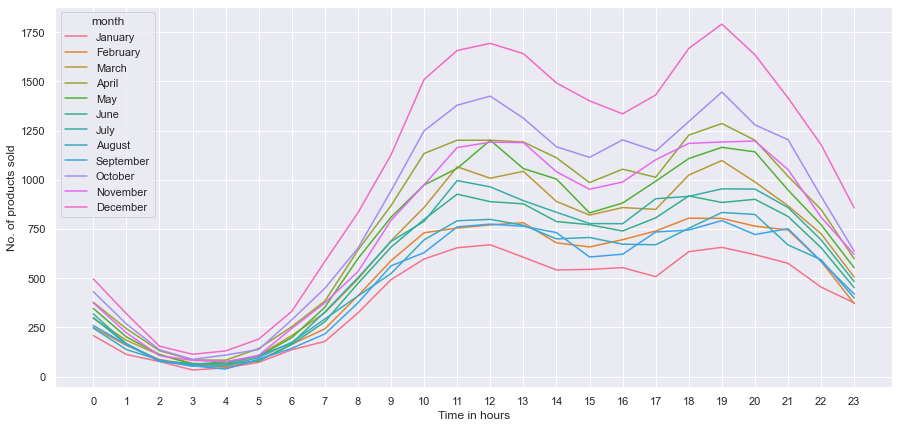

In [74]:
sns.lineplot(data = data2, x = 'hour', y = 'Product', hue = 'month', ci = 0)
plt.xticks(data2['hour'].unique())
# plt.legend(loc = (0.98,0.4))
# sns.reset_orig()
sns.set(rc = {'figure.figsize':(15,7)})
plt.grid(visible = True)
plt.xlabel('Time in hours')
plt.ylabel('No. of products sold')

# On average for all months 12pm and 7pm to be best

Text(0.5, 0, 'Time in hours')

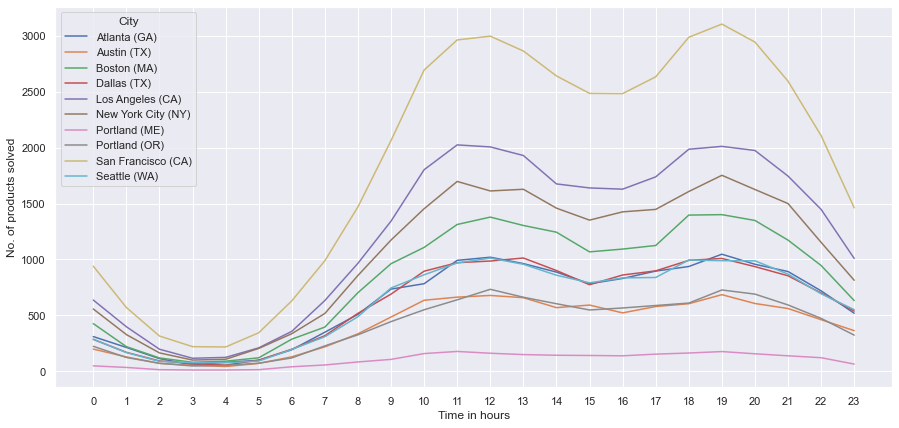

In [350]:
sns.lineplot(data = data3, x = 'hour', y = 'Product', hue = 'City')
plt.xticks(data3['hour'].unique())
plt.grid(visible = True)
plt.ylabel('No. of products solved')
plt.xlabel('Time in hours')

# Similar to month wise plot peak times are 11am - 12pm and 7pm

### Finding which products are often sold together

In [263]:
data2 = data.copy()
data2['Match'] = data2['Order Date'].dt.minute.map(lambda x : str(x - x % 10)) + '_' + data2['Order Date'].dt.date.map(str) + '_' + data2['Purchase Address']
data2 = data2[data2['Match'].duplicated(keep = False)]
data2
# The starting value(before first underscore) of Match column is minute
# All the minute values have been mapped to their lower bound multiple of 10, eg - 23->20, 36->30
# This will consider orders which have different ids but nearby time (and for same address and date)
# These are cases when individual orders are made and not from cart

Order ID                     Product  Quantity Ordered  \
April     2       176560                Google Phone               1.0   
          3       176560            Wired Headphones               1.0   
          17      176574                Google Phone               1.0   
          18      176574        USB-C Charging Cable               1.0   
          29      176585  Bose SoundSport Headphones               1.0   
...                  ...                         ...               ...   
September 11572   259303       AA Batteries (4-pack)               1.0   
          11583   259314            Wired Headphones               1.0   
          11584   259314      AAA Batteries (4-pack)               2.0   
          11620   259350                Google Phone               1.0   
          11621   259350        USB-C Charging Cable               1.0   

                 Price Each  Total Price          Order Date  \
April     2          600.00       600.00 2019-04-12 14:38:00   
          3           11.99        11.99 2019-04-12 14:38:00   
          17         600.00       600.00 2019-04-03 19:42:00   
          18          11.95        11.95 2019-04-03 19:42:00   
          29          99.99        99.99 2019-04-07 11:31:00   
...                     ...          ...                 ...   
September 11572        3.84         3.84 2019-09-20 20:18:00   
          11583       11.99        11.99 2019-09-16 00:25:00   
          11584        2.99         5.98 2019-09-16 00:25:00   
          11620      600.00       600.00 2019-09-30 13:49:00   
          11621       11.95        11.95 2019-09-30 13:49:00   

                                      Purchase Address                City  \
April     2       669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)   
          3       669 Spruce St, Los Angeles, CA 90001    Los Angeles (CA)   
          17         20 Hill St, Los Angeles, CA 90001    Los Angeles (CA)   
          18         20 Hill St, Los Angeles, CA 90001    Los Angeles (CA)   
          29         823 Highland St, Boston, MA 02215         Boston (MA)   
...                                                ...                 ...   
September 11572          106 7th St, Atlanta, GA 30301        Atlanta (GA)   
          11583     241 Highland St, Atlanta, GA 30301        Atlanta (GA)   
          11584     241 Highland St, Atlanta, GA 30301        Atlanta (GA)   
          11620  519 Maple St, San Francisco, CA 94016  San Francisco (CA)   
          11621  519 Maple St, San Francisco, CA 94016  San Francisco (CA)   

                                                             Match  
April     2      30_2019-04-12_669 Spruce St, Los Angeles, CA 9...  
          3      30_2019-04-12_669 Spruce St, Los Angeles, CA 9...  
          17       40_2019-04-03_20 Hill St, Los Angeles, CA 90001  
          18       40_2019-04-03_20 Hill St, Los Angeles, CA 90001  
          29       30_2019-04-07_823 Highland St, Boston, MA 02215  
...                                                            ...  
September 11572        10_2019-09-20_106 7th St, Atlanta, GA 30301  
          11583   20_2019-09-16_241 Highland St, Atlanta, GA 30301  
          11584   20_2019-09-16_241 Highland St, Atlanta, GA 30301  
          11620  40_2019-09-30_519 Maple St, San Francisco, CA ...  
          11621  40_2019-09-30_519 Maple St, San Francisco, CA ...  

[14684 rows x 9 columns]

In [264]:
data2['Together'] = data2.groupby(by = ['Match'])['Product'].transform(lambda x : ','.join(x))
req = data2[['Order ID', 'Together']].drop_duplicates()
req

Order ID                                           Together
April     2       176560                      Google Phone,Wired Headphones
          17      176574                  Google Phone,USB-C Charging Cable
          29      176585  Bose SoundSport Headphones,Bose SoundSport Hea...
          31      176586                AAA Batteries (4-pack),Google Phone
          118     176672      Lightning Charging Cable,USB-C Charging Cable
...                  ...                                                ...
September 11561   259296  Apple Airpods Headphones,Apple Airpods Headphones
          11563   259297  iPhone,Lightning Charging Cable,Lightning Char...
          11571   259303       34in Ultrawide Monitor,AA Batteries (4-pack)
          11583   259314            Wired Headphones,AAA Batteries (4-pack)
          11620   259350                  Google Phone,USB-C Charging Cable

[7171 rows x 2 columns]

In [267]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in req['Together']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Which products were sold the most

In [339]:
data2 = data.copy()
data2 = data.reset_index(level = 0).rename(columns = {'level_0' : 'Months'})
pt = pd.pivot_table(data = data2, index = 'Months', columns = 'Product', aggfunc = 'sum')['Quantity Ordered']
print('Quantity Ordered')
pt = pt.reindex(index = months)
pt

Quantity Ordered


Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
Months,,,,,,,,,,,,,,,,,,,
January,215.0,312.0,419.0,314.0,1425.0,1596.0,814.0,659.0,243.0,318.0,39.0,42.0,1151.0,235.0,217.0,1284.0,125.0,1081.0,379.0
February,246.0,428.0,475.0,418.0,1736.0,1975.0,1013.0,844.0,314.0,381.0,38.0,40.0,1497.0,275.0,277.0,1654.0,129.0,1282.0,439.0
March,326.0,479.0,609.0,524.0,2216.0,2478.0,1321.0,1197.0,362.0,463.0,50.0,64.0,1875.0,380.0,344.0,1944.0,174.0,1662.0,538.0
April,395.0,565.0,737.0,653.0,2822.0,2936.0,1525.0,1288.0,459.0,581.0,77.0,61.0,2371.0,455.0,392.0,2270.0,220.0,2066.0,695.0
May,340.0,542.0,688.0,544.0,2383.0,2931.0,1359.0,1174.0,399.0,480.0,76.0,64.0,2077.0,463.0,368.0,2069.0,186.0,1875.0,639.0
June,321.0,452.0,568.0,454.0,2095.0,2160.0,1167.0,984.0,367.0,391.0,43.0,55.0,1688.0,356.0,315.0,1676.0,155.0,1476.0,532.0
July,327.0,483.0,605.0,462.0,2072.0,2366.0,1221.0,1060.0,399.0,411.0,55.0,52.0,1812.0,368.0,318.0,1847.0,145.0,1563.0,503.0
August,262.0,439.0,492.0,381.0,1826.0,2019.0,1010.0,880.0,331.0,360.0,46.0,48.0,1441.0,299.0,275.0,1462.0,143.0,1290.0,438.0
September,277.0,382.0,482.0,378.0,1773.0,1927.0,968.0,830.0,294.0,342.0,30.0,46.0,1433.0,288.0,249.0,1594.0,126.0,1302.0,398.0


<AxesSubplot:xlabel='Product'>

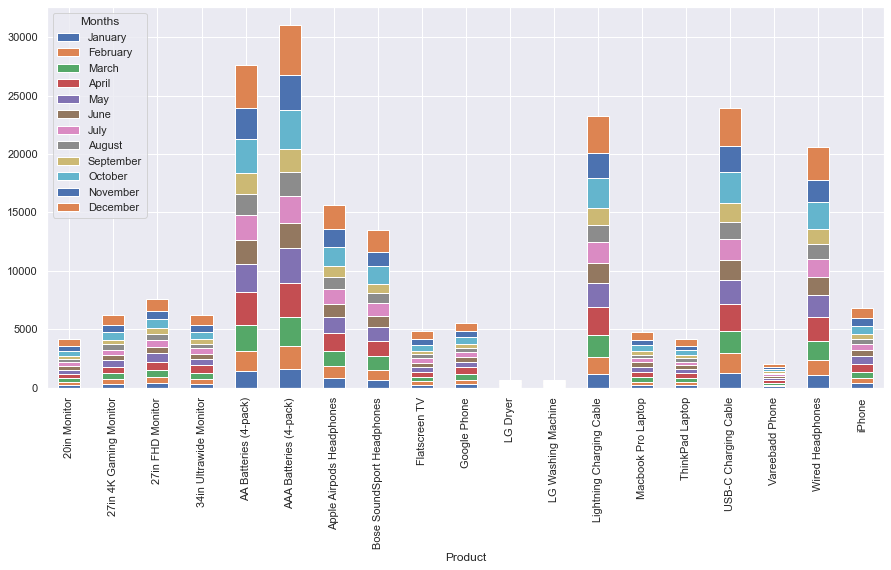

In [337]:
pt.T.plot(kind = 'bar', stacked = True)

In [342]:
pt = pd.pivot_table(data = data2, index = 'City', columns = 'Product', aggfunc = 'sum')['Quantity Ordered']
pt

Product,20in Monitor,27in 4K Gaming Monitor,27in FHD Monitor,34in Ultrawide Monitor,AA Batteries (4-pack),AAA Batteries (4-pack),Apple Airpods Headphones,Bose SoundSport Headphones,Flatscreen TV,Google Phone,LG Dryer,LG Washing Machine,Lightning Charging Cable,Macbook Pro Laptop,ThinkPad Laptop,USB-C Charging Cable,Vareebadd Phone,Wired Headphones,iPhone
City,,,,,,,,,,,,,,,,,,,
Atlanta (GA),342.0,493.0,588.0,482.0,2193.0,2359.0,1266.0,1084.0,407.0,451.0,59.0,52.0,1879.0,379.0,357.0,1915.0,173.0,1579.0,544.0
Austin (TX),230.0,318.0,360.0,328.0,1424.0,1668.0,887.0,707.0,242.0,274.0,55.0,26.0,1307.0,251.0,210.0,1251.0,108.0,1130.0,377.0
Boston (MA),394.0,675.0,797.0,671.0,3016.0,3461.0,1653.0,1416.0,554.0,593.0,59.0,72.0,2491.0,479.0,447.0,2561.0,214.0,2222.0,753.0
Dallas (TX),343.0,481.0,587.0,512.0,2261.0,2504.0,1194.0,1063.0,420.0,461.0,44.0,51.0,1864.0,382.0,345.0,1852.0,178.0,1669.0,519.0
Los Angeles (CA),658.0,1003.0,1223.0,955.0,4438.0,4967.0,2473.0,2125.0,727.0,848.0,116.0,105.0,3772.0,751.0,641.0,3782.0,317.0,3270.0,1118.0
New York City (NY),560.0,842.0,1072.0,868.0,3630.0,4124.0,2098.0,1794.0,628.0,758.0,77.0,85.0,3041.0,657.0,560.0,3269.0,281.0,2707.0,881.0
Portland (ME),59.0,85.0,114.0,76.0,389.0,358.0,233.0,180.0,62.0,77.0,6.0,11.0,269.0,63.0,53.0,340.0,17.0,279.0,79.0
Portland (OR),219.0,349.0,416.0,327.0,1550.0,1722.0,866.0,709.0,250.0,278.0,31.0,26.0,1262.0,274.0,221.0,1242.0,107.0,1083.0,371.0
San Francisco (CA),1000.0,1460.0,1814.0,1446.0,6555.0,7408.0,3733.0,3317.0,1154.0,1358.0,143.0,180.0,5557.0,1136.0,963.0,5894.0,494.0,4966.0,1661.0


<AxesSubplot:xlabel='Product'>

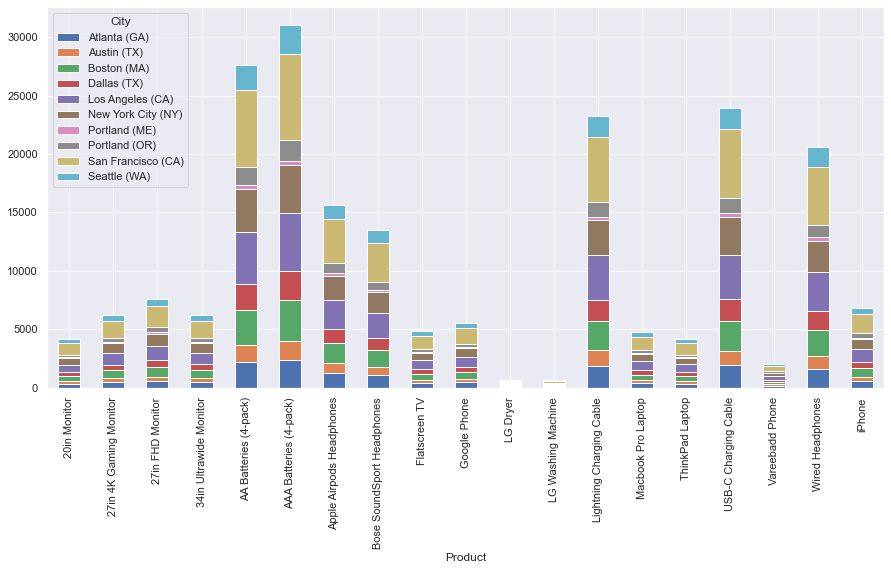

In [351]:
pt.T.plot(kind = 'bar', stacked = True)